# Biweekly check-in 1:
# Jacob Tiede
## Pytorch:  
I would like to start this class by learning a completely new framework for myself. I am relatively comfortable with Tensorflow, so I've decided to try my hand at learning Pytorch since much of the world is switching to this particular library. To start, I will go through the tutorial given in the Pytorch documentation (found at https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).
### Starting with the Basics: defining tensors in Pytorch:
This tutorial gets started by first teaching us how to define tensors in the framework. Here is some code quickly replicating what they did in general:

In [1]:
import torch
#define the number of rows in the matrix (tensor) we will have:
m = 10
#define the number of columns in the matrix (tensor):
n = 5
#Create an empty mxn matrix
x = torch.empty(m,n)
#this command creates a matrix whose initial values are just whatever was in memory when it was created, these do not have meaning yet
print("x generated by the empty torch command")
print(x)

x generated by the empty torch command
tensor([[1.0922e-33, 7.3568e-43, 5.1125e+10, 3.1809e-43, 0.0000e+00],
        [0.0000e+00, 2.1019e-44, 0.0000e+00, 1.7139e-31, 7.3568e-43],
        [5.1125e+10, 3.1809e-43, 0.0000e+00, 0.0000e+00, 2.1019e-44],
        [0.0000e+00, 1.7141e-31, 7.3568e-43, 5.1125e+10, 3.1809e-43],
        [0.0000e+00, 0.0000e+00, 2.1019e-44, 0.0000e+00, 1.6623e-31],
        [7.3568e-43, 5.1125e+10, 3.1809e-43, 0.0000e+00, 0.0000e+00],
        [2.1019e-44, 0.0000e+00, 3.5980e-34, 7.3568e-43, 1.3359e-30],
        [7.3568e-43, 0.0000e+00, 0.0000e+00, 2.1019e-44, 0.0000e+00],
        [7.7672e-32, 7.3568e-43, 5.1125e+10, 3.1809e-43, 0.0000e+00],
        [0.0000e+00, 2.1019e-44, 0.0000e+00, 7.1604e-32, 7.3568e-43]])


In [2]:
#Other than the above admittidly strange function it appears torch is very similar to numpy. Here's somemore useful functions that torch gives:
#rand generates an mxn matrix of values between 0 and 1
x = torch.rand(m, n)
print("access the shape of our random mxn matrix x:")
print(x.shape)
#zeros is another numpy like function, notice that we can specify the dtype
x = torch.zeros(m, n, dtype=torch.long)
#likewise ones works the same way in torch that it does in numpy, the neuance here is that we are using the old definition of our tensor x to implement this method
#From what I can tell calling torch tensor.new_*** will create a new tensor with the same data type, shape, and device origin as the original tensor.
#For instance if x is on one of two GPU's on the system then y = x.new_ones(...) will create y on the same GPU. For more help look at:
#https://stackoverflow.com/questions/49263588/pytorch-beginner-tensor-new-method
x = x.new_ones(m, n, dtype=torch.double)
#below we create a random array, but notice that x is input as the shape. This tells torch to use the same shape as x in our random array.
x = torch.randn_like(x, dtype=torch.float)
print("A random array created by passing a tensor as the argument gives a shape that is the same as the tensor that was passed:")
print(x.shape)

access the shape of our random mxn matrix x:
torch.Size([10, 5])
A random array created by passing a tensor as the argument gives a shape that is the same as the tensor that was passed:
torch.Size([10, 5])


In [3]:
#Now we will do some basic operations with torch. Most of these are the same as numpy, but I wanted to show one thing:
y = torch.rand(m, n)
result = torch.empty(m, n)
#note how our call to add is not assigned anywhere, but out is specified to be result. This might come in handy with how python can sometimes be
#strange since it doesn't allow you to manually mess around with pointers
torch.add(x, y, out=result)
print("printing the new variable result that we assigned in a torch function call:")
print(result)

printing the new variable result that we assigned in a torch function call:
tensor([[ 0.1633, -0.6951,  2.4036, -0.0044,  1.3156],
        [-0.2912,  1.4591, -0.1051,  1.1841,  1.2355],
        [ 1.2754,  0.5530,  1.0499,  0.7307, -1.2935],
        [ 0.1548, -1.1758,  2.8805,  0.1603,  0.0835],
        [ 1.1278,  0.3396, -0.2115,  0.0185,  1.6049],
        [-0.1611, -0.2447,  0.1081, -0.3364,  2.6343],
        [ 0.5206,  2.1911,  2.1136,  1.4357,  1.2614],
        [ 0.2896,  2.2721, -1.5574,  1.0305,  0.9955],
        [ 1.4452,  1.7177, -0.0483,  0.5212, -1.4841],
        [ 0.4270,  0.1738,  0.2458,  0.7684,  1.1679]])


In [4]:
#in place modification:
#Anything with the form tensor.action_() will modify a tensor inplace, for instance
print("the variable y before modification in place")
print(y)
print("the variable y after modification in place")
y.add_(x)
print(y)

the variable y before modification in place
tensor([[0.6658, 0.0265, 0.6522, 0.1923, 0.9168],
        [0.3700, 0.7787, 0.4352, 0.4184, 0.5490],
        [0.3539, 0.7346, 0.3369, 0.4367, 0.2759],
        [0.9171, 0.6698, 0.4515, 0.9459, 0.1758],
        [0.8349, 0.1385, 0.6979, 0.2805, 0.4618],
        [0.2322, 0.7407, 0.3311, 0.1983, 0.7149],
        [0.7286, 0.4148, 0.3918, 0.5335, 0.0332],
        [0.1118, 0.1901, 0.1624, 0.4500, 0.6149],
        [0.8831, 0.0681, 0.6667, 0.6334, 0.3391],
        [0.8324, 0.2644, 0.6638, 0.2543, 0.7370]])
the variable y after modification in place
tensor([[ 0.1633, -0.6951,  2.4036, -0.0044,  1.3156],
        [-0.2912,  1.4591, -0.1051,  1.1841,  1.2355],
        [ 1.2754,  0.5530,  1.0499,  0.7307, -1.2935],
        [ 0.1548, -1.1758,  2.8805,  0.1603,  0.0835],
        [ 1.1278,  0.3396, -0.2115,  0.0185,  1.6049],
        [-0.1611, -0.2447,  0.1081, -0.3364,  2.6343],
        [ 0.5206,  2.1911,  2.1136,  1.4357,  1.2614],
        [ 0.2896,  2.2721, 

In [5]:
#reshaping tensors is done with the view command:
x = torch.randn(m, n)
y = x.view(m*n)
z = x.view(-1, m)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([10, 5]) torch.Size([50]) torch.Size([5, 10])


In [6]:
#convert a single item tensor to a python number with the item() command:
print(x[1,1].item())

-0.5894734859466553


In [7]:
#vastly more important is coverting to numpy, this can be done with the .numpy() command, but note that this still points to the same location in memory:
b = x.numpy()
print("b before modification to x: ")
print(b)
x.add_(1)
print("b after modification to x: ")
print(b)

b before modification to x: 
[[ 1.643435   -0.6238072  -0.61476934  0.10705452 -0.9052117 ]
 [ 1.1171722  -0.5894735   1.1670934   0.49936208 -0.5510719 ]
 [ 0.7426107   0.7561228   0.58012956  0.46350247 -0.13601384]
 [-2.316694    0.36470023 -0.4784208  -0.4028493  -0.17014903]
 [ 0.02343391 -0.79745674 -0.94779074  0.0129158  -0.6455073 ]
 [ 0.70595646  1.9267724   0.1017128  -0.25368923  0.7237639 ]
 [-2.2986865   0.7346068  -0.612748    0.13444388 -1.2137313 ]
 [ 0.5199435  -0.48631525  0.23039384  2.199451    1.4229885 ]
 [ 0.5520638  -0.29971498  1.6909237  -1.511683   -0.9730301 ]
 [ 1.206867   -1.1892847   0.73251706 -0.35736308 -0.50916773]]
b after modification to x: 
[[ 2.643435    0.3761928   0.38523066  1.1070545   0.09478831]
 [ 2.1171722   0.4105265   2.1670933   1.4993621   0.44892812]
 [ 1.7426107   1.7561228   1.5801296   1.4635024   0.86398613]
 [-1.316694    1.3647002   0.5215792   0.5971507   0.829851  ]
 [ 1.0234339   0.20254326  0.05220926  1.0129158   0.3544927

In [8]:
#finally, converting numpy arrays to tensors:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Differentiation in Pytorch
Now we will learn about autograd, a function in Pytorch that keeps track of all the operations preformed on a given tensor. This is what allows us to backpropogate our neural network (this is the second tutorial found at https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html):

In [9]:
#we tell Pytorch to keep track of gradients by setting the variable requires_grad to True when we create the instance of the tensor:
a = torch.ones(2,2,requires_grad = True)
#Getting the back propogation involves calling grad_fn on a tensor that is some transformation of the original, for instance:
b = a + 30
z = b * 3
out = z.mean()
print(z.grad_fn)

In [10]:
#to preform backpropogation we simply call .backward() on the transformed object
out.backward()
#this finds all the gradients, so we are able to call .grad on x to get db/dx:
print(a.grad)

tensor([[0.7500, 0.7500],
        [0.7500, 0.7500]])


### Neural Nets:
We've now gotten enough Pytorch to make our first neural network. These use the torch.nn package which abstracts a lot of the process. This is following the third tutorial found at https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [11]:
import torch.nn as nn
import torch.nn.functional as F

#Pytorch works with classes to define it's model (unlike tensorflow which can be done inline or in a function (tensorflow does work with classes, but it's less
#common)), passing nn.Module to the net class tells torch everything it needs to know to make it function provided that there are a few methods
class Net(nn.Module):
    def __init__(self):
        #Super is a python function that specifies that our current class is a subclass of some other class. In fact, super(subclass, object) will look one heirachy level 
        #above subclass to find the method that it is using, and self refers to the specific object that we will be bubbling up in classes. Since we have called Net a 
        #subclass of nn.module this line of code initializes nn.Module (the class that is one level up from Net) on the object self, for more info see: 
        #https://realpython.com/python-super/#an-overview-of-pythons-super-function
        super(Net, self).__init__()
        
        # The following set up variables that we will need later. These are all tensors (so they have all the methods that we learned about earlier)
        # 1 input image channel, 6 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(400, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    #this defines the forward pass of our model THIS IS ESSENTIAL FOR THE NEURAL NET TO FUNCTION
    def forward(self, x):
        # First, take x and apply our first convolutional layer to it (see the __init__ method), then apply a relu to that activation. 
        # Finally, apply max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Remember that view reshapes the tensor, so this is a flattening layer since it contains a -1 we will get an output shape of 
        # (nSamples, nChannels * number of features (which has changed from the original due to the convolutions and pooling))
        x = x.view(-1, self.num_flat_features(x))
        # Now we have two fully connected layers (as defined in __init__()) with relu activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # This is the output layer, it is important to note that it's shape must correspond to the number of classes we are classifying to
        x = F.softmax(self.fc3(x), dim = 1)
        return x
    #Gets the number of features after all of the dimensionality reduction is applied to x from the convolutions and maxpoolings
    def num_flat_features(self, x):
        # x's shape is originally nSamples, nChannels, Height, Width for images, so we want to compute nChannels * num features = nChannels * Current Height * Current Width
        # (current referring to after conv and pooling)
        size = x.shape[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [12]:
params = list(net.parameters())
print(len(params))
# It should be noted that the size of conv1 (printed here) is nChannels, nSamples, 3x3 window
print(params[0].shape)  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [13]:
#forward propogation seems easy, simply pass it to the Net object
#Note again that input has dimension nSamples,nChannels, Height, Width
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[0.0869, 0.1087, 0.1008, 0.1081, 0.0969, 0.1026, 0.1091, 0.0971, 0.1024,
         0.0874]], grad_fn=<SoftmaxBackward>)


### Loss Functions and Backprop
Now that we have defined the neural net we now must train it. Continuing on the tutorial for Pytorch we will use mean squared error for this loss, though our neural net is designed to classify digits, so it might be better to use categorical cross entropy in the future.

In [14]:
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

#loss is calculated from a forward propogation step and a known target
loss = criterion(out, target)
print(loss)

tensor(1.0035, grad_fn=<MseLossBackward>)


In [15]:
# To backpropogate we need to clear existing gradients since Pytorch would just add them otherwise
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-1.5125e-04, -9.1290e-04,  2.0423e-03,  4.1258e-04,  1.5447e-04,
         5.4629e-05])


In [16]:
#Now we have to update the weights
learning_rate = 0.01
for f in net.parameters():
    #Remember the _ will replace f in memory
    f.data.sub_(f.grad.data * learning_rate)

In [17]:
#OTHER UPDATE RULES (for all practical purposes we will mostly use these in the future)
import torch.optim as optim
# create your optimizer, in this case with stochastic gradient descent as the update rule
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

### Image classification using Pytorch
Rather than simply continue with the tutorial at this point I think I will try to run what I have on a different dataset (specifically the MNIST dataset) to see if I've grasped everything on my own. I downloaded this data from: https://www.kaggle.com/c/digit-recognizer/data?select=test.csv. The following code is based on the previous tutorials and the code found in the fourth tutorial at https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html, though I am applying the ideas to a different dataset.

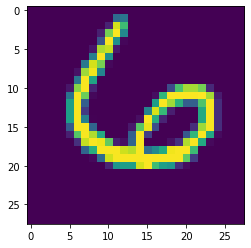

In [18]:
#To start we will load and format the training data in python:
import pandas as pd
trainData = pd.read_csv("./MNIST_train.csv")
train_y = trainData['label'].to_numpy()
train_x = trainData.to_numpy()
#The first column is the label column so we will remove that
train_x = train_x[:,1:train_x.shape[1]]
#turn our data into torch tensors
train_y = torch.from_numpy(train_y)
train_x = torch.from_numpy(train_x)
#We now need to reshape train_x so that it is in the correct format for the image classifier
train_x = train_x.view(train_x.shape[0], 1, int(np.sqrt(train_x.shape[1])), int(np.sqrt(train_x.shape[1])))
#Split into test and train datasets (since the MNIST_test.csv file is unlabeled)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1, random_state=4)

#Now we'll look an image and write a function that will take a tensor and show the plot of the image
import matplotlib.pyplot as plt

def TImShow(image):
    image = image[0,:,:]
    plt.imshow(image.detach().numpy())
    plt.show()
TImShow(train_x[1,:,:,:])

In [19]:
#Now we'll train this network (see the Net class from the previous section)
#Define the criterion as categoritcal cross entropy
criterion = nn.CrossEntropyLoss()
#we will use the adam optimizer for this
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

#Train the model:
#The number of epochs to do on the whole dataset
epochs = 10
#Note that this training loop was inspired by the documentation found here:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
for epoch in range(epochs):
    #running_loss (from the pytorch documentation) will keep track of the average loss as we train
    running_loss = 0.0
    for i in range(train_x.shape[0]):
        #set the gradients to zero (or else we'll just keep adding to gradients)
        optimizer.zero_grad()
        #create the input image constructed from a single image, we have to reshape it (using veiw()) to make it usable by our neural network
        input = train_x[i,:,:,:].view(1,1,28,28)
        outputs = net(input.float())
        
        #our loss is calculated using cross entropy, we reshape train_y[i] here because it needs to have the same first dimension as outputs
        loss = criterion(outputs, train_y[i].view(1))
        #calculate the gradients and take a step using the optimizer
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20000 == 19999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20000))
            running_loss = 0.0

print('Finished Training')

[1, 20000] loss: 1.759
[2, 20000] loss: 1.504
[3, 20000] loss: 1.494
[4, 20000] loss: 1.490
[5, 20000] loss: 1.485
[6, 20000] loss: 1.483
[7, 20000] loss: 1.482
[8, 20000] loss: 1.482
[9, 20000] loss: 1.479
[10, 20000] loss: 1.479
Finished Training


In [20]:
#Now that we've trained the model we can look at our accuracy on the testset
predicted = np.zeros((test_x.shape[0], 10))
running_loss = 0
for i in range(test_x.shape[0]):
    input = test_x[i,:,:,:].view(1,1,28,28)
    outputs = net(input.float())
    
    loss = criterion(outputs, test_y[i].view(1))
    predicted[i,:] = outputs.detach().numpy()
    running_loss += loss.item()
print("The loss on the test set was: " + str(running_loss/test_x.shape[0]))
correct = 0
for i in range(predicted.shape[0]):
    pred = np.argmax(predicted[i,:])
    if int(pred) == int(test_y[i]):
        correct += 1
print("The accuracy on the test set was: " + str(correct/predicted.shape[0]))

The loss on the test set was: 1.4833077643882662
The accuracy on the test set was: 0.9776190476190476


### Final Thoughts
I think Pytorch is defintiely worth learning more of, and there is certainly ways to improve this current neural net (namely using mini-batches, and shuffling the data in the training loop), but I think that I would like to move to something more challenging now that I know how to use Pytorch.

## Generative Adversarial Neural Networks (GANs) in Pytorch
For a more complex application of Pytorch I will again use the MNST data to create a generative adversarial neural network that creates digits. To start we'll detail what a GAN is.
### What is the General Structure of a GAN
To get a general idea of what a GAN is and how to use it I will briefly summarize this article: https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/. The article details two general types of GANs, the first being a "typical" GAN, and the second being a more advanced "conditional" GAN. Since I have never learned about or implemented a GAN I will focus on the simpler "typical" GAN rather than the "conditional" GAN. In general, these networks contain two neural networks, the first being a "discriminator" and the second being a "generator". The discriminator's job is simply to determine if an image is real (from the original dataset) or fake (not from the original data set). The generator's job is then to create examples (using randomly generated numbers from the so called "latent" space) that trick the discriminator into believing that the images are actually from the dataset. The trick is, the generator never sees any examples from the real dataset, it must wholly rely on feedback from the discriminator. Generally, this means that the scheme for training these nets is to feed the discriminator examples from both the real dataset and the generator and train it to discriminate these, then tell the generator how well it is doing based on how convincing its generated examples were to the discriminator. This means that the loss of our generator is actually implicitly defined interms of another neural network, which is certainly an interesting way of solving this problem. With that brief explanation let's get into some of the details of this implementation.
### The Loss Functions
To get a better understanding of the original loss function we will first look at the original paper that detailed GANs (found here: https://arxiv.org/pdf/1406.2661.pdf). According to the paper we update the discriminator using the following loss function:
$$
\frac{1}{m}\sum_{i=1}^{m}log(D(x^{(i)})) +log(1-(D(G(z^{(i)})))
$$
Where $m$ is the number of examples in a mini-batch $D(x)$ is the discriminator evaluated on a mini-batch of images x, $G(z)$ is a mini-batch of images generated by the generator given a noise input z, then $x^{(i)}$ and $z^{(i)}$ are just specific instances of either images in the actual data set or noise generated for a particular mini-batch. One interesting aspect of this scheme is that we would actually like to maximize this function. This should make sense if one considers $D(x)$ as a probability that the image x belongs to the data set (it is not fake). This means that a in a good discriminator we would have $log(D(x^{(i)})) \approx log(1) = 0$ and $log(1-(D(G(z^{(i)}))) \approx log(1 - 0) = 0$ and since $log(1-(D(G(z^{(i)}))) < 0$ if the discriminator is even partially fooled (in fact if our discriminator is very bad then we can see $log(1-(D(G(z^{(i)}))) \approx log(1-.99999999...) \rightarrow -\infty$), which implies that in order to make a good discriminator we would like to preform gradient ascent on the above function, or equivalently we can do gradient descent on:
$$
\frac{-1}{m}\sum_{i=1}^{m}log(D(x^{(i)})) +log(1-(D(G(z^{(i)})))
$$
Next, the paper details the loss function for the generator as:
$$
\frac{1}{m}\sum_{i=1}^{m}log(1-(D(G(z^{(i)})))
$$
Which we would like to minimize (for similar reasons to the previous paragraph, a good generator would fool the discriminator so $log(1-(D(G(z^{(i)}))) \approx log(1-1) \rightarrow -\infty$ which is the min of this function since the discriminator outputs a probability).
### Are these the Best Loss Choices?
Like with many things in Deep Learning it appears that the first iteration could be improved upon, so I'll briefly go over one other loss (closely related to the one I just detailed only with a slight change in thinking), and then I'll explain a more drastically different loss that preforms much better than either of the others. The first improvement (detailed through a course from google: https://developers.google.com/machine-learning/gan/loss, and I believe later in the original paper: https://arxiv.org/pdf/1406.2661.pdf) will change the way we view the original loss. The original paper mentions that using the loss $\frac{1}{m}\sum_{i=1}^{m}log(1-(D(G(z^{(i)})))$ for the generator might make the generator neural net stop learning early (because the discriminators job is too easy so it converges on a good solution too fast), and their suggested fix was to instead maximize $log(D(G(z)))$ (or equivalently minimize $-log(D(G(z)))$). Practically speaking this means that we are maximizing the probability that D is fooled instead of minimizing that probability that D is not fooled (which is the interpretation of the original loss). However, this still isn't the best loss to use. The linked course from Google describes Wasserstein loss, which will further mitigate the problem of stopping training prematurely. This loss first requires a modification to the discriminator (now called a "critic"): it must output any real number instead of a number constrained to be between 0 and 1. I will provide an explanation for why I believe this change is warranted, but the linked course does not describe this theoretical link (so I'll make a guess at why). This then allows us to redefine the losses as:
$$
D(x)-D(G(z))
$$
For the critic, and
$$
D(G(z))
$$
for the generator. Both of these losses are to be maximized under this scheme, which will force the critic to output a large number if the instance is real and a small (or negative) number if it is fake. Theoretically, I think this loss eliminates the problem of having a $log$ in the loss function. In the prior scheme the log had a singularity for a finite input, meaning if the discriminator is very good (which it tends to be in the beginning because it is pretty easy to discriminate between the images of a barely trained generator and real images) we get a loss of infinity. Removing the log removes the possibility that a very good discriminator can give the generator a loss of infinity.
### Architecture and Implementation of this Neural Net
For this final section I will make use of many of the implementation notes found in this blog post: https://machinelearningmastery.com/how-to-code-a-wasserstein-generative-adversarial-network-wgan-from-scratch/. I'll detail the general neural net structure and some of the most important features, but first I think it is important to quickly talk about one of the most important elements of this network: transposed convolutions:
#### Aside: Transposed Convolutions
In general, a transposed convolution is an upsampling technique that uses trainable parameters to do upsampling. Unlike methods like unpooling (which algorithmically upsample an image) transposed convolutions use kernels similar to convolutional neural nets to address the same problem, except it will take each pixel of the image and map it to more pixels of the output image. For instance a 2x2 kernel in a transposed convolution will take every pixel of the input image and map that pixel to a 2x2 region of the output image (adding any overlapping regions together). For more detail this is a good article on the topic: https://towardsdatascience.com/transposed-convolution-demystified-84ca81b4baba.
#### The Neural Network's Architecture
The discriminator is structured similarly to classification nets that we have gone over in class, so I will just give the structure:  
 
The article's implementation of the discriminator: 2DConvolution with 64 4x4 filters, same padding, stride 2 -> Batch normalization -> leaky ReLU -> 2DConvolution with 64 4x4 filters, same padding, stride 2 -> Batch normalization -> leaky ReLU -> Dense layer with a single neuron as output.  
 
This implementation is somewhat difficult in pytorch since same padding is more easily defined for odd filter sizes (and since Pytorch doesn't have a padding = 'same' option so I am the one who will have to figure out the padding size). To this end I'll list the discriminator that I am going to implement:  
 
My implementation of the discriminator: 2DConvolution with 64 3x3 filters, same padding, stride 2 -> Batch normalization -> leaky ReLU -> 2DConvolution with 64 3x3 filters, same padding, stride 2 -> Batch normalization -> leaky ReLU -> Dense layer with a single neuron as output.  
 
Now, the generator's implementation is a little more complex, because it needs to take randomly generated points in the latent space and turn them into images. This is a lot of dimensional book keeping which I will summarize:  
 
The article's implementation of the generator: A dense layer with $128*7*7$ nodes -> reshape this into image like data with 128 channels of 7x7 "images" -> transposed convolution with 4x4 filters, same padding and stride 2, this upscales to a 14x14 image -> Batch normalization -> leaky ReLU -> transposed convolution with 4x4 filters, same padding and stride 2 this upscales to a 28x28 image-> Batch normalization -> leaky ReLU -> 2D convolution with 1 7x7 filter and same padding, this collapses everything into a single image -> tanh activation  
#### Other Implementation notes
The training data that I am using is only of the digit '4'. When extracting samples of data from the training data we must rescale them to be between -1 and 1 (since our generator's activation forces it to generate images within this range), because otherwise the critic's job is too easy. The gradient descent algorithm used is RMSprop according to the article. Weight clipping is required for the critic. The critic has to be trained more often than the generator to prevent the model from converging to a bad solution.


In [21]:
#Lets start by getting all of the '4's in the dataset 
trainData = trainData[trainData['label'] == 4]
train_y = trainData['label'].to_numpy()
train_x = trainData.to_numpy()
train_x = train_x[:,1:train_x.shape[1]]
#turn our data into torch tensors
train_y = torch.from_numpy(train_y)
train_x = torch.from_numpy(train_x)
#We now need to reshape train_x so that it is in the correct format for the image classifier
train_x = train_x.view(train_x.shape[0], 1, int(np.sqrt(train_x.shape[1])), int(np.sqrt(train_x.shape[1])))

In [22]:
# For reproducability
torch.manual_seed(1)
# Define the critic/discriminator model
class Discriminator(nn.Module):
    #Note that exImg will contain and example image which we can get the dimension of NOTE: this should have dimension (1, 1, height, width)
    #batchSize will be the size of the batches (this is not actually used, but it is sometimes good to have for debugging)
    def __init__(self, exImg):
        super(Discriminator, self).__init__()
        # The article uses same padding, which is not trivial to implement in pytorch. We will use the padding function with 
        #p = (filter size - 1)/2 = 1 to get same padding
        self.inputImg = exImg
        self.conv1 = nn.Conv2d(1, 64, 3, stride = 2, padding = 1)
        self.batchNorm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, stride = 2, padding = 1)
        self.batchNorm2 = nn.BatchNorm2d(64)
        self.leReLU = nn.LeakyReLU(.2)
        #Note I found the number of inputs to this layer by experimentation, so I just manually entered the number
        self.fc1 = nn.Linear(3136, 1)

    def forward(self, x):
        x = self.leReLU(self.conv1(x))
        x = self.batchNorm1(x)
        x = self.leReLU(self.conv2(x))
        x = self.batchNorm2(x)
        # Remember that view reshapes the tensor, so this is a flattening layer since it contains a -1 we will get an output shape of
        # (nSamples, nChannels * number of features (which has changed from the original due to the convolutions and pooling))
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        return x
    #Gets the number of features after all of the dimensionality reduction is applied to x from the convolutions and maxpoolings
    def num_flat_features(self, x):
        # x's shape is originally nSamples, nChannels, Height, Width for images, so we want to compute nChannels * num features = 
        # nChannels * Current Height * Current Width (current referring to after conv and pooling)
        size = x.shape[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
batch_size = 32
exImg = train_x[0,:,:,:].view(1,1,28,28)
dis = Discriminator(exImg)
print(dis)

Discriminator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leReLU): LeakyReLU(negative_slope=0.2)
  (fc1): Linear(in_features=3136, out_features=1, bias=True)
)


In [23]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.leReLU = nn.LeakyReLU(.2)
        #Start with a 100 variable input from the latent space, and turn it into 7x7x128 linear vector (we'll reshape this next in the forward pass)
        self.fc1 = nn.Linear(100, 7*7*128)
        #next we need to upsample with a transposed convolution
        self.tConv1 = nn.ConvTranspose2d(128, 128, 4, stride = 2, padding = 1)
        self.batchNorm1 = nn.BatchNorm2d(128)
        self.tConv2 = nn.ConvTranspose2d(128, 128, 4, stride = 2, padding = 1)
        self.batchNorm2 = nn.BatchNorm2d(128)
        self.conv1 = nn.Conv2d(128, 1, 7, padding = 3)
        #this must have output dimension equal to the image
        
    def forward(self, x):
        x = self.leReLU(self.fc1(x))
        x = x.view(-1,128,7,7) #working with 7x7 images
        x = self.leReLU(self.batchNorm1(self.tConv1(x))) #upscale to 14x14
        x = self.leReLU(self.batchNorm2(self.tConv2(x))) #upscale to 28x28
        x = torch.tanh(self.conv1(x))
        return x
gen = Generator()
print(gen)

Generator(
  (leReLU): LeakyReLU(negative_slope=0.2)
  (fc1): Linear(in_features=100, out_features=6272, bias=True)
  (tConv1): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tConv2): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(128, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
)


The generator's first attempt at generating an image: 


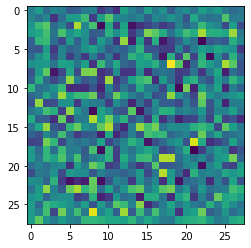

[2,   127] loss: 1.365


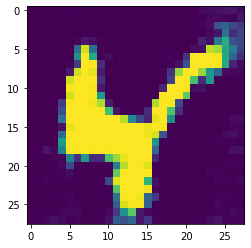

[4,   127] loss: 3.854


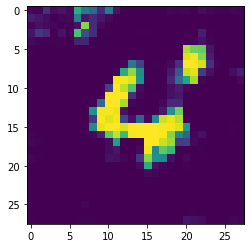

[6,   127] loss: 5.827


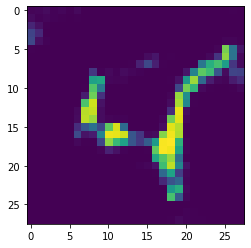

[8,   127] loss: 7.463


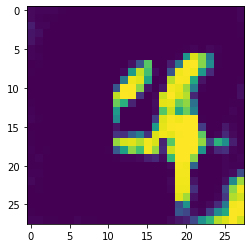

[10,   127] loss: 8.234


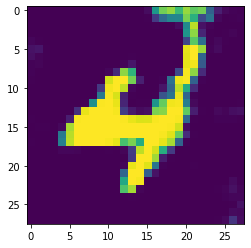

[12,   127] loss: 9.241


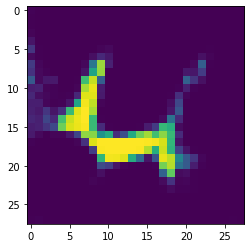

[14,   127] loss: 9.405


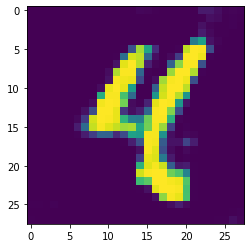

[16,   127] loss: 10.781


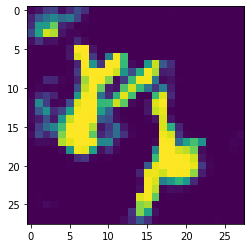

[18,   127] loss: 10.916


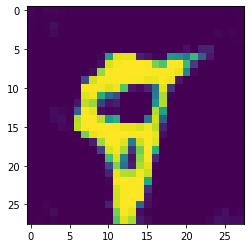

[20,   127] loss: 11.016


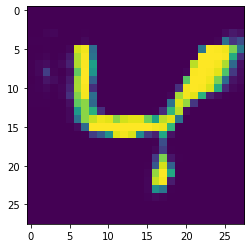

Done traininig


In [24]:
def getRealSamples(data, batch_size):
    temp = torch.randperm(batch_size)
    result = data[temp, :, :, :]
    #rescale to match generator, normal grey scale ranges from [0,255], so to do this rescale we will subtrack by the mid point and divide by the mid point 
    #(this will force all the values to be between -1 and 1)
    result = result.float()
    result = (result - 255/2)/(255/2)
    return result

#define our two optimizers
learning_rate = 5e-5
#Use two separate RMSProp optimizers, one for the generator and one for the discriminator
gOptimizer = torch.optim.RMSprop(gen.parameters(), lr=learning_rate)
dOptimizer = torch.optim.RMSprop(dis.parameters(), lr=learning_rate)
#Now we will define the training loop:
epochs = 20
batchesPerEpoch = int(np.floor(train_x.shape[0]/batch_size))
for epoch in range(epochs):
    running_gen_loss = 0
    for i in range(batchesPerEpoch):
        #number of extra times that we will train the critic
        criticConst = 5
        for j in range(criticConst):
            #set the gradients of the critic to zero
            dOptimizer.zero_grad()
            #generate a mini batch of gaussian noise
            genMiniBatch = torch.rand(batch_size, 100)
            #get a minibatch of the real data
            realMiniBatch = getRealSamples(train_x, batch_size)

            #Start by training the discriminator
            #Get Dx, the discriminator when applied to the minibatch of real data
            Dx = dis(realMiniBatch)
            #calculate the loss associated with this step
            dxLoss = -1*torch.mean(Dx)
            #find the gradients for this step
            dxLoss.backward()
            #generate fake images
            Gz = gen(genMiniBatch.float())
            #apply the discriminator to fake images
            DGz = dis(Gz.view(batch_size, 1, 28, 28))
            #Find the loss associated with this step
            dgzLoss = 1*torch.mean(DGz)
            #Accumulate the gradients for this half of the loss
            dgzLoss.backward()
            #set the total loss as the sum of our two previous losses
            dLoss = dgzLoss+dxLoss
            dOptimizer.step()
            #weight clipping. I used https://discuss.pytorch.org/t/set-constraints-on-parameters-or-layers/23620/7 as a reference
            #it appears that j.data will allow us to modify non-leaf nodes of our computational graph despite the fact that they require gradients. 
            #It also appears that this feature is depreciated, and it shouldn't be used until after our optimizer has taken a step because it might 
            #mess with the backpropogation.
            #Note: I found the .clamp_ function does exactly what one would think (it makes sure that all the values of a tensor are within the given range) 
            #and the _ denotes that the operation is an inplace operation.
            for j in dis.parameters():
                j.data.clamp_(-.1,.1)
        
        
        #set the generator's gradients to zero
        gOptimizer.zero_grad()
        genMiniBatch = torch.rand(batch_size*2, 100)
        #use the generator to make a new batch of images (even though we have already computed this we need to recompute it for pytorch to understand 
        #how to backpropogate)
        Gz = gen(genMiniBatch.float())
        #apply the discriminator to the generated images
        DGz = dis(Gz.view(batch_size*2, 1, 28, 28))
        #calculate the loss
        gLoss = -1*torch.mean(DGz)
        #accumulate the gradients
        gLoss.backward()
        gOptimizer.step()
            
        if epoch == 0 and i == 0:
            print("The generator's first attempt at generating an image: ")
            Gz = Gz.view(batch_size*2,1,28,28)
            TImShow(Gz[0,:,:,:])
        # print statistics and image
        running_gen_loss += gLoss.item()
        if i == batchesPerEpoch-1 and epoch%2 == 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_gen_loss/batchesPerEpoch))
            Gz = Gz.view(batch_size*2,1,28,28)
            TImShow(Gz[0,:,:,:])
                
print("Done traininig")

### Final Thoughts
This seemed to work out well, though you can see some iterations where it is less that ideal. I learned many advanced techniques in Pytorch, but it was slow to train. This is probably because I'm currently running purely on CPU, so in the next section I will learn to use my GPU.

## Using a GPU with Pytorch
Now that I've worked with Pytorch in a CPU setting I've decided to try training it on a GPU. To start we will verify that a GPU is available:

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
print("Is a GPU available? ")
torch.cuda.is_available()

Is a GPU available? 


True

Looks good! Now I'll retrain my generative adversarial neural network using this GPU:

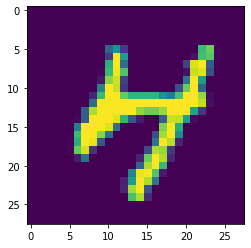

In [2]:
#To start we will load and format the training data in python:

trainData = pd.read_csv("./MNIST_train.csv")
#Lets start by getting all of the '4's in the dataset 
trainData = trainData[trainData['label'] == 4]
train_y = trainData['label'].to_numpy()
train_x = trainData.to_numpy()
train_x = train_x[:,1:train_x.shape[1]]
#turn our data into torch tensors
train_y = torch.from_numpy(train_y)
train_x = torch.from_numpy(train_x)
#We now need to reshape train_x so that it is in the correct format for the image classifier
train_x = train_x.view(train_x.shape[0], 1, int(np.sqrt(train_x.shape[1])), int(np.sqrt(train_x.shape[1])))

#Now we'll look an image and write a function that will take a tensor and show the plot of the image
import matplotlib.pyplot as plt

def TImShow(image):
    image = image[0,:,:]
    #need to be in cpu to use the numpy() command
    plt.imshow(image.cpu().detach().numpy())
    plt.show()
TImShow(train_x[1,:,:,:])

Using the advice from https://discuss.pytorch.org/t/solved-make-sure-that-pytorch-using-gpu-to-compute/4870 I will use the .cuda() command on any input tensors and any models.

In [10]:
# For reproducability
torch.manual_seed(1)
# Define the critic/discriminator model
class Discriminator(nn.Module):
    #Note that exImg will contain and example image which we can get the dimension of NOTE: this should have dimension (1, 1, height, width)
    #batchSize will be the size of the batches
    def __init__(self, exImg):
        super(Discriminator, self).__init__()
        # The article uses same padding, which is not trivial to implement in pytorch. We will use the padding function with 
        #p = (filter size - 1)/2 = 1 to get same padding
        self.inputImg = exImg
        self.conv1 = nn.Conv2d(1, 64, 3, stride = 2, padding = 1)
        self.batchNorm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, stride = 2, padding = 1)
        self.batchNorm2 = nn.BatchNorm2d(64)
        self.leReLU = nn.LeakyReLU(.2)
        self.fc1 = nn.Linear(3136, 1)

    def forward(self, x):
        x = self.leReLU(self.conv1(x))
        x = self.batchNorm1(x)
        x = self.leReLU(self.conv2(x))
        x = self.batchNorm2(x)
        # Remember that view reshapes the tensor, so this is a flattening layer since it contains a -1 we will get an output shape of
        # (nSamples, nChannels * number of features (which has changed from the original due to the convolutions and pooling))
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        return x
    #Gets the number of features after all of the dimensionality reduction is applied to x from the convolutions and maxpoolings
    def num_flat_features(self, x):
        # x's shape is originally nSamples, nChannels, Height, Width for images, so we want to compute nChannels * num features = 
        # nChannels * Current Height * Current Width (current referring to after conv and pooling)
        size = x.shape[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
#load full data into python, no need to split into test and train since this is not about accuracy
train_y = trainData['label'].to_numpy()
train_x = trainData.to_numpy()
train_x = train_x[:,1:train_x.shape[1]]
#turn our data into torch tensors
train_y = torch.from_numpy(train_y)
train_x = torch.from_numpy(train_x)
#We now need to reshape train_x so that it is in the correct format for the image classifier
train_x = train_x.view(train_x.shape[0], 1, int(np.sqrt(train_x.shape[1])), int(np.sqrt(train_x.shape[1])))
batch_size = 32
exImg = train_x[0,:,:,:].view(1,1,28,28)
dis = Discriminator(exImg)
dis.cuda()
print(dis)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.leReLU = nn.LeakyReLU(.2)
        #Start with a 100 variable input from the latent space, and turn it into 7x7x128 linear vector (we'll reshape this next in the forward pass)
        self.fc1 = nn.Linear(100, 7*7*128)
        #next we need to upsample with a transposed convolution
        self.tConv1 = nn.ConvTranspose2d(128, 128, 4, stride = 2, padding = 1)
        self.batchNorm1 = nn.BatchNorm2d(128)
        self.tConv2 = nn.ConvTranspose2d(128, 128, 4, stride = 2, padding = 1)
        self.batchNorm2 = nn.BatchNorm2d(128)
        self.conv1 = nn.Conv2d(128, 1, 7, padding = 3)
        #this must have output dimension equal to the image
        
    def forward(self, x):
        x = self.leReLU(self.fc1(x))
        x = x.view(-1,128,7,7) #working with 7x7 images
        x = self.leReLU(self.batchNorm1(self.tConv1(x))) #upscale to 14x14
        x = self.leReLU(self.batchNorm2(self.tConv2(x))) #upscale to 28x28
        x = torch.tanh(self.conv1(x))
        return x
gen = Generator()
gen.cuda()
print(gen)

Discriminator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leReLU): LeakyReLU(negative_slope=0.2)
  (fc1): Linear(in_features=3136, out_features=1, bias=True)
)
Generator(
  (leReLU): LeakyReLU(negative_slope=0.2)
  (fc1): Linear(in_features=100, out_features=6272, bias=True)
  (tConv1): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tConv2): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(128, 1, kernel_size=(7, 7), s

The generator's first attempt at generating an image: 


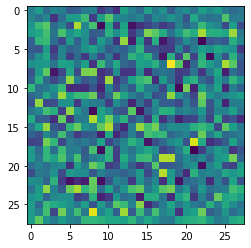

[20,   127] loss: 9.962


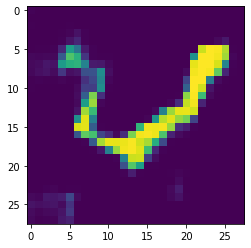

[40,   127] loss: 9.786


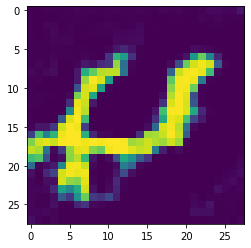

[60,   127] loss: 9.641


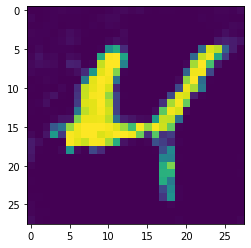

[80,   127] loss: 9.483


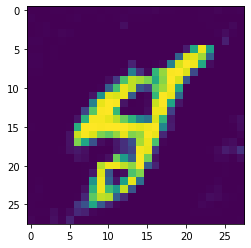

[100,   127] loss: 9.275


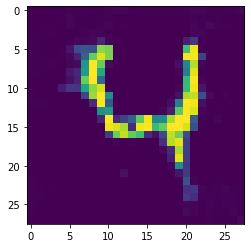

[120,   127] loss: 9.218


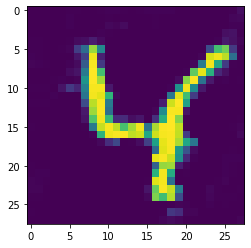

[140,   127] loss: 9.055


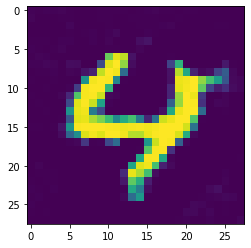

[160,   127] loss: 8.968


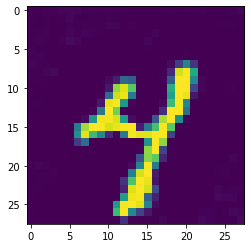

[180,   127] loss: 8.786


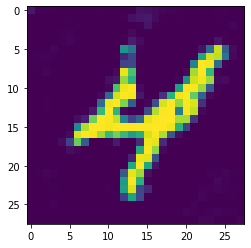

[200,   127] loss: 8.751


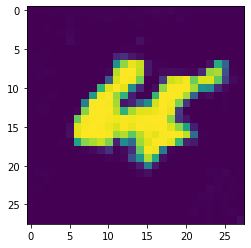

Done traininig


In [11]:
def getRealSamples(data, batch_size):
    temp = torch.randperm(batch_size)
    result = data[temp, :, :, :]
    #rescale to match generator, normall grey scale ranges from [0,255], so to do this rescale we will subtrack by the mid point and divide by the mid point
    #(this will force all the values to be between -1 and 1)
    result = result.float()
    result = (result - 255/2)/(255/2)
    return result
#define our two optimizers
learning_rate = 5e-5
#Use two separate RMSprop optimizers, one for the generator and one for the discriminator
gOptimizer = torch.optim.RMSprop(gen.parameters(), lr=learning_rate)
dOptimizer = torch.optim.RMSprop(dis.parameters(), lr=learning_rate)
#Now we will define the training loop:
epochs = 200
batchesPerEpoch = int(np.floor(train_x.shape[0]/batch_size))
for epoch in range(epochs):
    running_gen_loss = 0
    for i in range(batchesPerEpoch):
        #number of times we train the critic for each training step on the generator
        criticConst = 5
        for j in range(criticConst):
            #set the gradients of the discriminator to zero
            dOptimizer.zero_grad()
            #generate a mini batch of gaussian noise
            genMiniBatch = torch.rand(batch_size, 100).float()
            genMiniBatch = genMiniBatch.cuda()
            #get a minibatch of the real data
            realMiniBatch = getRealSamples(train_x, batch_size)
            realMiniBatch = realMiniBatch.cuda()

            #Start by training the discriminator
            #Get Dx, the discriminator when applied to the minibatch of real data
            Dx = dis(realMiniBatch)
            #calculate the loss associated with this step
            dxLoss = -1*torch.mean(Dx)
            #find the gradients for this step
            dxLoss.backward()
            #generate fake images
            Gz = gen(genMiniBatch.float())
            #apply the discriminator to fake images
            Gz = Gz.view(batch_size, 1, 28, 28)
            Gz = Gz.cuda()
            DGz = dis(Gz)
            #Find the loss associated with this step
            dgzLoss = 1*torch.mean(DGz)
            #Accumulate the gradients for this half of the loss
            dgzLoss.backward()
            #set the total loss as the sum of our two previous losses
            dLoss = dgzLoss+dxLoss
            dOptimizer.step()
            #weight clipping. I used https://discuss.pytorch.org/t/set-constraints-on-parameters-or-layers/23620/7 as a reference
            #it appears that j.data will allow us to modify non-leaf nodes of our computational graph despite the fact that they require gradients. 
            #It also appears that this feature is depreciated, and it shouldn't be used until after our optimizer has taken a step because it might mess 
            #with the backpropogation. Note: the .clamp_ function does exactly what one would think (it makes sure that all the values of a tensor are 
            #within the given range) and the _ denotes that the operation is an inplace operation.
            for j in dis.parameters():
                j.data.clamp_(-.1,.1)
        
        
        #set the generator's gradients to zero
        gOptimizer.zero_grad()
        genMiniBatch = torch.rand(batch_size*2, 100)
        genMiniBatch = genMiniBatch.cuda()
        #use the generator to make a new batch of images (even though we have already computed this we need to recompute it for pytorch to understand 
        #how to backpropogate)
        Gz = gen(genMiniBatch.float())
        #apply the discriminator to the generated images
        Gz = Gz.view(batch_size*2, 1, 28, 28)
        Gz = Gz.cuda()
        DGz = dis(Gz)
        #calculate the loss
        gLoss = -1*torch.mean(DGz)
        #accumulate the gradients
        gLoss.backward()
        gOptimizer.step()
            
        if epoch == 0 and i == 0:
            print("The generator's first attempt at generating an image: ")
            Gz = Gz.view(batch_size*2,1,28,28)
            TImShow(Gz[0,:,:,:])
        # print statistics and image
        running_gen_loss += gLoss.item()
        if i == batchesPerEpoch-1 and epoch%20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_gen_loss/batchesPerEpoch))
            Gz = Gz.view(batch_size*2,1,28,28)
            TImShow(Gz[0,:,:,:])
            #running_gen_loss = 0.0
                
print("Done traininig")

This is much faster than I was expecting. As someone who had never done machine learning with a GPU before I had thought that I might cut my time in half, but rather than taking ~10 minutes per epoch each epoch was finished in a matter of seconds. This will definitly make training models much easier in the future.

## Improving our Predictive Power with Residual Neural Networks (Res Nets)
### Defining a ResNet
For this section I will be summarizing this article: https://towardsdatascience.com/introduction-to-resnets-c0a830a288a4. A goal of mine has been to truly solve the "Hello World" of image classification problems: to classify handwritten digits. To truly solve this problem I think I should be able to get higher accuracy than even the deepest convolutional neural networks. Fortunately there is a deceptively simple way to get a little more accuracy than the traditional models of Alex net and LeNet: residual neural networks. The problem with traditional convolutional nets (as the blog post states) is that they don't actually continue to get more accurate with more layers. In fact, the opposite begins to happen. With more complexity from added layers the traditional convolutional net will begin to perform worse than their less complex counterparts. One way to solve this is through residual learning. These layers (or residual blocks as they are sometimes referred to) are basically layers that "remember" a prior input by adding it's activation to an output of a later layer. For example, say you had a convolutional layer that looked like this:  
 
Input -> Convolution -> output -> g(output)  
 
A residual block would record the activation of the input layer, then the final non-linearity g would become g(output + input). One way to mathematically think about this is to call the input $x$ a tensor of shape ($C$ x $N$ x $M$), note that there could also be a batch size dimension, but for simplicity I have omitted that. Then our convolution would apply some kind weight matrix $W$ and non-linearity to our input $x$, followed by a non-linearity $g$, so the output could be written as $output = g(x,W)$. With the skip connection we can attain a final output as $y_{output} = g(x,W) + W_sx$ where $W_s$ is a tensor that will transform the shape of $x$ to match that of $g(x,W)$. Now, one way to think of why it helps is that it appears that it is very easy for the neural net to learn the identity function. It is very easy for $W$ to be set to zero and $W_s$ to be the identity tensor thus making the convolution layer irrelevant. This means that if the model doesn't believe that a particular layer is useful it can just skip it rather than having to learn an extremely complex function, but it also has an advantage over not including this convolution layer since the net might still learn something useful from it. This translates to residual layers giving the potential to learn useful features, but not making the model needlessly complex. It should also follow that we can make the model deeper without sacrificing accuracy under this scheme, and this is the trend observed in the article.
### A More Modern Variant of Res Net: Dense Net
For this section I will detail an slightly newer variant of Res Net: Dense Net (as detailed in this article: https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035). This is a slight alteration that relies not on addition, but concatenation. To start let's define a concatenation operation:
#### Concatenation
Concatenation is simply appending along a dimension. For our purposes this dimension will always be the 'channels' dimension. For example, let's say that you have two tensors $x$ and $y$ whose dimensions are both $(Channels, Height, Width)$ then the concatenation of $x$ and $y$ along their $Channels$ dimension would produce a tensor $z$ of dimension $(2*Channels, Height, Width)$. This naturally leads into the definition of a 'dense block' in our dense net:
#### Dense Block
A good picture of this can be found in the article, but I will do my best to explain in words. To start we will have an input of size $(C, H, W)$ where $C$ is the number of channels in the input, $H$ is the height of the image, and $W$ is the width of the image that is saved into memory. We then put this through a set of convolutions that typically follow the pattern:  
 
1x1 Convolution -> 3x3 Convolution -> Output  
 
The 1x1 Convolution (sometimes called a 'bottle-neck' layer) is used to reduce the number of channels that are input into the 3x3 Convolution (because we'll see this could get very high, though not in the first layer). The output of this layer is then concatenated with the input along the $C$ dimension creating a new tensor with dimension $(C+3x3C, H, W)$ where $3x3C$ is the number of channels that the 3x3 convolution outputs. In general, the output of a given 3x3 convolution in this block will be concatenated with all of the previous 3x3 convolution's outputs as well as the input, so for the $n$th 3x3 convolution we will get a tensor of dimension $(C+3x3C*n, H, W)$ after the concatenation. This scheme allows our model to more easily propagate features through the neural net since we are directly providing all of the previous learned features to every other stage of the block. As a note, due to how we have defined our concatenation steps the dimensions $H$ and $W$ must remain the same throughout this block, so the only time that we can apply pooling in this scheme are the so-called transition layers.
#### Transition Layers
These layers allow us to apply pooling to reduce the dimension of our data. These layers are not connected to other layers through concatenation like within the dense block, so there is no need to retain the dimensions $H$ and $W$. However, given the potentially large number of channels in the output of a dense block we must first apply a 1x1 convolution to the dense block output to reduce this number. So, in general, a transition layer will look something like this:  
 
1x1 convolution -> pooling  
 
Note: the degree to which this 1x1 convolution reduces the channel dimension is called the compression factor.
#### Other Implementation Notes
The final layer (before a fully connected layer with a softmax activation used for the classification itself) has a global pool operation. The original implementation of dense net used average pooling for its transition layers, I've opted for max pooling since this has given me substantially better accuracy on the test set. Also, from what I can tell from the article, within the dense blocks there is no activation or batch normalization of the 1x1 convolution before it is passed to the 3x3 convolution. I've included these since it appears they increase the accuracy of the model on the test set. I've also opted to use a global max pool rather than a global average pool in the final layer since this also appears to increase the accuracy. I'm not entirely sure why this is, but I can try to speculate. I think that there are so many filters in the end that it is easier for the net to converge to a useful solution if it only needs to worry about ensureing that the largest value in the final filter is correct rather than a combination of numbers. I believe that average pooling would probably converge to a good solution with more training, but I don't think my computer is fast enough to get there. Finally, it is worth noting that I've included dropout layers in the dense blocks to try and mitigate overfitting in the model. These have a small probability, and are only applied to bottle neck layers in the block (this is because they feed almost directly into the 3x3 convolution blocks, so I think zeroing out some of the nodes on the 1x1 convolution will also make the 3x3 layer less prone to over fitting. I didn't want to include it on both because I would rather not have a lot of dropout on convolution layers if I can help it, and this solution seemed to work fine).

In [2]:
from sklearn.preprocessing import normalize
#First load the data, and split it into test and train sets: 
trainData = pd.read_csv("./MNIST_train.csv")
train_y = trainData['label'].to_numpy()
train_x = trainData.to_numpy()
train_x = train_x[:,1:train_x.shape[1]]
train_x = normalize(train_x)
#turn our data into torch tensors
train_y = torch.from_numpy(train_y)
train_x = torch.from_numpy(train_x)
#We now need to reshape train_x so that it is in the correct format for the image classifier
train_x = train_x.view(train_x.shape[0], 1, int(np.sqrt(train_x.shape[1])), int(np.sqrt(train_x.shape[1])))

#Split into test and train datasets (since the MNIST_test.csv file is unlabeled)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1, random_state=4)


In [3]:
class DenseBlock(nn.Module):
    def __init__(self, nChannelsInput, nLayers, nFilters3x3):
        super(DenseBlock, self).__init__()
        #training will tell us when to use and not use the dropout layers
        self.training = True
        #The first number of channels
        self.nChannelsInput = nChannelsInput
        #The number of layers of conv1x1 -> dropout -> batch norm -> conv3x3 -> batch norm that we will have
        self.nLayers = nLayers
        #The number of output filters from the 3x3 convolutions
        self.nFilters3x3 = nFilters3x3
        #This is equivalent to a relu function, but I like to be able to try adjustments to this activation, so I'm putting it as a leaky relu with 
        #negative slope of 0
        self.leReLU = nn.LeakyReLU(0)
        #make a list of all the required layers (need to do it this way since we do not know the number of layers in advance)
        self.drop = nn.ModuleList([nn.Dropout(p=0.2) for i in range(self.nLayers)])
        self.conv1x1 = nn.ModuleList([nn.Conv2d(self.nChannelsInput + self.nFilters3x3*i, 16 * (i+1), 1) for i in range(self.nLayers)])
        self.conv3x3 = nn.ModuleList([nn.Conv2d(16 * (i+1), self.nFilters3x3, 3, padding = 1) for i in range(self.nLayers)])
        self.batchNorm1 = nn.ModuleList([nn.BatchNorm2d(self.nChannelsInput + self.nFilters3x3*i) for i in range(self.nLayers)])
        self.batchNorm2 = nn.ModuleList([nn.BatchNorm2d(16 * (i+1)) for i in range(self.nLayers)])
        
    def forward(self, x):
        #x_mem keeps track of all the previous layers that we will want to append eventually
        x_mem = [x.clone()]
        #forward propogate
        for i in range(self.nLayers):
            #only apply dropout if we are training
            if self.training:
                x = self.conv3x3[i](self.batchNorm2[i](self.drop[i](self.conv1x1[i](self.leReLU(self.batchNorm1[i](x))))))
            else:
                x = self.conv3x3[i](self.batchNorm2[i](self.conv1x1[i](self.leReLU(self.batchNorm1[i](x)))))
            temp = x.clone()
            for j in x_mem:
                x = torch.cat((x, j), dim = 1)
            x_mem.append(temp)
        return x
    #sets the self variable 'training'
    def setTraining(self, x):
        self.training = x
    
class Net(nn.Module):
    #Note that exImg will contain and example image which we can get the dimension of NOTE: this should have dimension (1, 1, height, width)
    #batchSize will be the size of the batches
    def __init__(self, exImg):
        super(Net, self).__init__()
        #We don't need this for this particular model, but I like to keep track of an example input to make changes to the structure more easily should 
        #the need arise
        self.inputImg = exImg
        self.leReLU = nn.LeakyReLU(0)
        #To get same padding we must have W = (W−F+2P)/S+1 => P = 17 where W is the input size, F is the filter size, P is the padding size and S is the stride
        #see https://stats.stackexchange.com/questions/297678/how-to-calculate-optimal-zero-padding-for-convolutional-neural-networks for details
        self.conv1 = nn.Conv2d(1, 64, 7, padding = 17, stride = 2)
        self.batchNorm1 = nn.BatchNorm2d(64)
        self.dense1 = DenseBlock(64, 24, 64)
        self.conv2 = nn.Conv2d(64*25, 64, 1)
        self.batchNorm2 = nn.BatchNorm2d(64)
        self.dense2 = DenseBlock(64, 16, 64)
        self.conv3 = nn.Conv2d(64*17, 64, 1)
        self.batchNorm3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.leReLU(self.batchNorm1(self.conv1(x)))
        x = F.max_pool2d(x, 3, stride = 2, padding = 1)
        x = self.leReLU(self.batchNorm2(self.conv2(self.dense1(x))))
        x = F.max_pool2d(x, 2)
        x = F.max_pool2d(self.leReLU(self.batchNorm3(self.conv3(self.dense2(x)))), 7)
        x = x.view(-1, self.num_flat_features(x))
        x = F.softmax(self.fc1(x), dim = 1)
        return x
    #Gets the number of features after all of the dimensionality reduction is applied to x from the convolutions and maxpoolings
    def num_flat_features(self, x):
        # x's shape is originally nSamples, nChannels, Height, Width for images, so we want to compute 
        # nChannels * num features = nChannels * Current Height * Current Width (current referring to after conv and pooling)
        size = x.shape[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    #Tell our dense blocks whether or not to use dropout
    def setTraining(self, x):
        self.dense1.setTraining(x)
        self.dense2.setTraining(x)
        
exImg = train_x[0,:,:,:].view(1,1,28,28)
net = Net(exImg)
net.cuda()
print(net)


Net(
  (leReLU): LeakyReLU(negative_slope=0)
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(17, 17))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense1): DenseBlock(
    (leReLU): LeakyReLU(negative_slope=0)
    (drop): ModuleList(
      (0): Dropout(p=0.2, inplace=False)
      (1): Dropout(p=0.2, inplace=False)
      (2): Dropout(p=0.2, inplace=False)
      (3): Dropout(p=0.2, inplace=False)
      (4): Dropout(p=0.2, inplace=False)
      (5): Dropout(p=0.2, inplace=False)
      (6): Dropout(p=0.2, inplace=False)
      (7): Dropout(p=0.2, inplace=False)
      (8): Dropout(p=0.2, inplace=False)
      (9): Dropout(p=0.2, inplace=False)
      (10): Dropout(p=0.2, inplace=False)
      (11): Dropout(p=0.2, inplace=False)
      (12): Dropout(p=0.2, inplace=False)
      (13): Dropout(p=0.2, inplace=False)
      (14): Dropout(p=0.2, inplace=False)
      (15): Dropout(p=0.2, inplace=False)
      (16): Dropout(p=0.2, in

In [4]:
import time
#Now we'll train this network (see the Net class from the previous section)
#Define the criterion as categoritcal cross entropy
criterion = nn.CrossEntropyLoss()
#we will use the adam optimizer for this
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

#Train the model:
#The number of epochs to do on the whole dataset
epochs = 30
batch_size = 64
batchesPerEpoch = int(np.ceil(train_x.shape[0]/batch_size))
#Note that this training loop was inspired by the documentation found here: 
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
for epoch in range(epochs):
    #running_loss (from the pytorch documentation) will keep track of the average loss as we train
    running_loss = 0.0
    #shuffle the training data every epoch
    temp = torch.randperm(train_x.shape[0])
    train_x = train_x[temp, :, :, :]
    train_y = train_y[temp]
    for i in range(batchesPerEpoch):
        if i == 0 and epoch == 0:
            start = time.time()
        #set the gradients to zero (or else we'll just keep adding to gradients)
        optimizer.zero_grad()
        #create the input image constructed from a single image, we have to reshape it (using veiw()) to make it usable by our neural network
        if i == batchesPerEpoch - 1:
            input = train_x[i*batch_size:train_x.shape[0],:,:,:]
            target = train_y[i*batch_size:train_y.shape[0]]
        else:
            input = train_x[i*batch_size:(i+1)*batch_size,:,:,:]
            target = train_y[i*batch_size:(i+1)*batch_size]
        input = input.cuda()
        target = target.cuda()
        outputs = net(input.float())
        #our loss is calculated using cross entropy, we reshape train_y[i] here because it needs to have the same first dimension as outputs
        loss = criterion(outputs, target)
        #calculate the gradients and take a step using the optimizer
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i == 0 and epoch == 0:
            print("The time to complete 1 batch is: " + str(time.time()-start))
        if i == batchesPerEpoch-1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / batchesPerEpoch))
            running_loss = 0.0

print('Finished Training')

The time to complete 1 batch is: 2.9058990478515625
[1,   591] loss: 1.616
[2,   591] loss: 1.484
[3,   591] loss: 1.478
[4,   591] loss: 1.474
[5,   591] loss: 1.473
[6,   591] loss: 1.472
[7,   591] loss: 1.471
[8,   591] loss: 1.470
[9,   591] loss: 1.469
[10,   591] loss: 1.469
[11,   591] loss: 1.468
[12,   591] loss: 1.468
[13,   591] loss: 1.467
[14,   591] loss: 1.467
[15,   591] loss: 1.466
[16,   591] loss: 1.467
[17,   591] loss: 1.466
[18,   591] loss: 1.467
[19,   591] loss: 1.465
[20,   591] loss: 1.465
[21,   591] loss: 1.466
[22,   591] loss: 1.465
[23,   591] loss: 1.465
[24,   591] loss: 1.464
[25,   591] loss: 1.464
[26,   591] loss: 1.464
[27,   591] loss: 1.465
[28,   591] loss: 1.464
[29,   591] loss: 1.464
[30,   591] loss: 1.464
Finished Training


In [5]:
#Now that we've trained the model we can look at our accuracy on the testset
net.setTraining(False)
predicted = np.zeros((test_x.shape[0], 10))
running_loss = 0
for i in range(test_x.shape[0]):
    input = test_x[i,:,:,:].view(1,1,28,28).cuda()
    outputs = net(input.float())
    
    loss = criterion(outputs, test_y[i].view(1).cuda())
    predicted[i,:] = outputs.cpu().detach().numpy()
    running_loss += loss.item()
print("The loss on the test set was: " + str(running_loss/test_x.shape[0]))
correct = 0
for i in range(predicted.shape[0]):
    pred = np.argmax(predicted[i,:])
    if int(pred) == int(test_y[i]):
        correct += 1
print("The accuracy on the test set was: " + str(correct/predicted.shape[0]))

The loss on the test set was: 1.4907477596827916
The accuracy on the test set was: 0.9873809523809524


### Final Thoughts
This classifier is at least comparable if not better than one from the original Pytorch tutorial, though I still suspect that average pooling would eventually converge to an even better solution. Again, average pooling will probably be able to get a better solution eventually, but it is too slow to converge for my computer.
## Summary for this Progress Report
In this progress report I learned to use Pytorch by completing a tutorial, and a couple of projects using the framework. In the tutorial I learned the basics of creating tensors, and implementing neural nets. During the Generative Advisarial Neural Net portion I learned to use custom loss functions and how to adjust the training loop to fit a difficult model. Finally, I was able to implement complex custom layers (in the form of dense blocks) in the Residual Network section.